In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

### Loading data

In [3]:
df=pd.read_csv("Assignment2_q2_dataset.csv")
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [4]:
df.shape

(14620, 23)

In [5]:
# Calculate correlation matrix
correlation_matrix = df[['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price']].corr()

Text(0.5, 1.0, 'Correlation Heatmap')

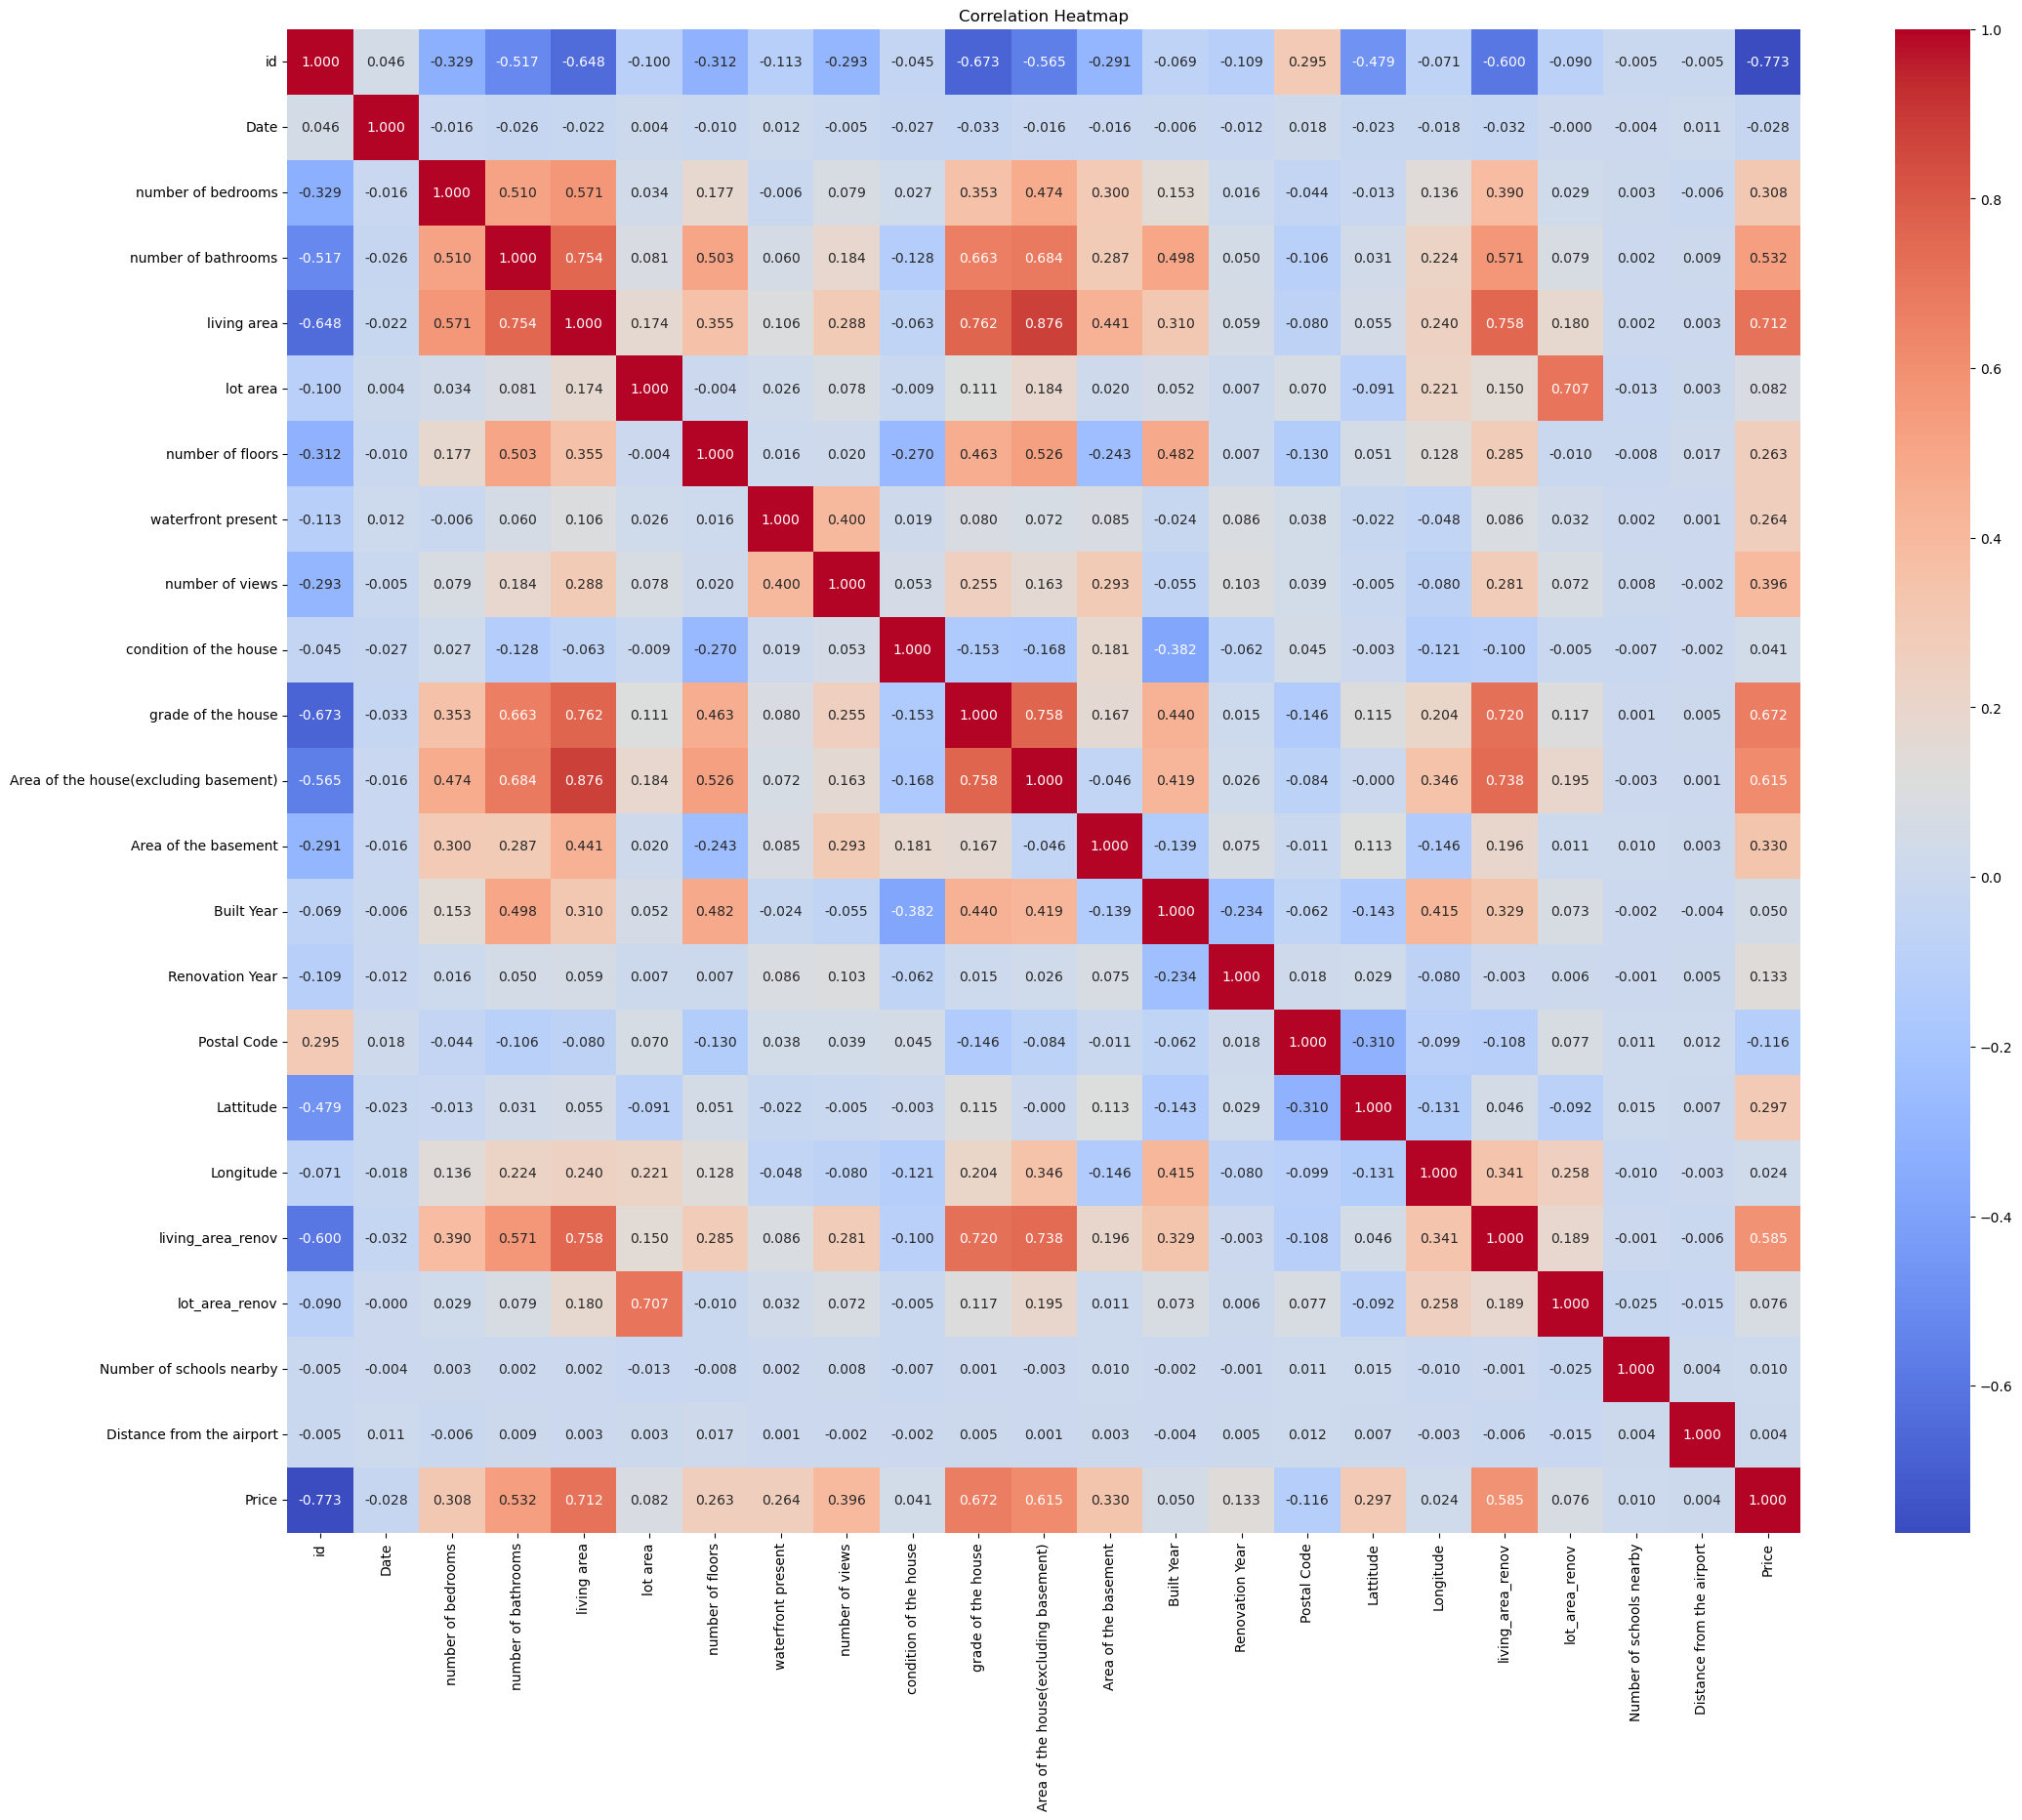

In [6]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(25, 20))

# Plot Heat map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap')

### Selecting Columns

In [7]:
df = df.drop(['condition of the house','Built Year','Date', 'lot area', 'Distance from the airport', 'Number of schools nearby', 'lot_area_renov', 'Lattitude', 'Longitude'], axis=1)

In [8]:
scaler=StandardScaler()
normalized_data= scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [9]:
X=normalized_df.iloc[:,:-1]
Y=normalized_df.iloc[:,-1]

X=np.asarray(X)
Y=np.asarray(Y)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=47, shuffle=True)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10965, 13)
(3655, 13)
(10965,)
(3655,)


## Define neural network

In [12]:
input_size=X_train.shape[1] #Number of features

hidden_size=64 #Number of neurons in the hidden layer

output_size=1 #Single output for regression


In [13]:
#Randomly initialize weights and bias for the hidden  layers

np.random.seed(42)

In [14]:
hidden_weights=np.random.randn(input_size,hidden_size)

In [15]:
hidden_weights

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
        -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
        -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
         1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
         0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
        -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
         0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
         0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
         0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
        -0.47917424, -0.18565898, -1.10633497, -1.19620662],
       [ 0.81252582,  1.35624003, -0.07201012,  1.0035329 ,  0.

In [16]:
hidden_bias=np.zeros(hidden_size)

In [17]:
hidden_bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
hidden_bias.shape

(64,)

In [19]:
output_weights=np.random.randn(hidden_size,output_size)

In [20]:
output_weights

array([[-1.00414077],
       [-0.76779757],
       [-0.03468489],
       [ 0.23421473],
       [ 1.55050049],
       [-0.99835404],
       [ 0.9843224 ],
       [-0.21398884],
       [-0.04946371],
       [ 0.67481949],
       [-1.12272202],
       [ 0.38240975],
       [ 0.16645221],
       [ 0.49245126],
       [ 0.28916864],
       [ 2.45530014],
       [-0.63773998],
       [-0.53099696],
       [-0.62314053],
       [-0.55547712],
       [-0.63738713],
       [ 1.18901653],
       [ 1.42050425],
       [-0.57074629],
       [-0.83235557],
       [ 0.47141556],
       [-0.55222304],
       [ 0.63293182],
       [ 0.20292302],
       [-1.51574411],
       [ 1.5475052 ],
       [ 1.79587767],
       [-0.61278869],
       [-0.38770156],
       [ 0.28586539],
       [ 0.33445679],
       [ 0.65854427],
       [ 2.01020454],
       [-0.17694723],
       [-0.79829724],
       [-1.37931923],
       [-0.73093004],
       [-0.03312697],
       [ 1.79455786],
       [-0.5176113 ],
       [ 0

In [21]:
output_bias=np.zeros(output_size)

In [22]:
output_bias

array([0.])

# Train data into neural network

In [23]:
learning_rate=0.1
num_epochs=100001
for epoch in range(num_epochs):
    #forward propagation
    hidden_layer_input=np.dot(X_train,hidden_weights)+hidden_bias
    hidden_layer_output=1/(1+np.exp(-hidden_layer_input))
    predictions=np.dot(hidden_layer_output,output_weights)+output_bias
    
    #Compute loss(mean squared error)
    loss=np.mean((predictions-Y_train.reshape(-1,1))**2)
    output_error=2*(predictions-Y_train.reshape(-1,1))  #Gradient of mean squared error
    
    #Backpropagagtion
    hidden_error=np.dot(output_error,output_weights.T)*hidden_layer_output*(1-hidden_layer_output)
    output_weights-=learning_rate*np.dot(hidden_layer_output.T,output_error)/len(Y_train)
    output_bias-=learning_rate*np.sum(output_error)/len(Y_train)
    
    hidden_weights-=learning_rate*np.dot(X_train.T,hidden_error)/len(Y_train)
    hidden_bias-=learning_rate*np.sum(hidden_error)/len(Y_train)
    
    if epoch%100==0:
        print(f"Epoch{epoch}, Loss: {loss:.4f}")


Epoch0, Loss: 94.0659
Epoch100, Loss: 0.4536
Epoch200, Loss: 0.3783
Epoch300, Loss: 0.3341
Epoch400, Loss: 0.3077
Epoch500, Loss: 0.2887
Epoch600, Loss: 0.2730
Epoch700, Loss: 0.2592
Epoch800, Loss: 0.2468
Epoch900, Loss: 0.2354
Epoch1000, Loss: 0.2249
Epoch1100, Loss: 0.2153
Epoch1200, Loss: 0.2065
Epoch1300, Loss: 0.1985
Epoch1400, Loss: 0.1913
Epoch1500, Loss: 0.1846
Epoch1600, Loss: 0.1786
Epoch1700, Loss: 0.1730
Epoch1800, Loss: 0.1678
Epoch1900, Loss: 0.1630
Epoch2000, Loss: 0.1585
Epoch2100, Loss: 0.1543
Epoch2200, Loss: 0.1503
Epoch2300, Loss: 0.1465
Epoch2400, Loss: 0.1428
Epoch2500, Loss: 0.1393
Epoch2600, Loss: 0.1358
Epoch2700, Loss: 0.1324
Epoch2800, Loss: 0.1291
Epoch2900, Loss: 0.1259
Epoch3000, Loss: 0.1227
Epoch3100, Loss: 0.1196
Epoch3200, Loss: 0.1166
Epoch3300, Loss: 0.1137
Epoch3400, Loss: 0.1109
Epoch3500, Loss: 0.1082
Epoch3600, Loss: 0.1055
Epoch3700, Loss: 0.1030
Epoch3800, Loss: 0.1005
Epoch3900, Loss: 0.0982
Epoch4000, Loss: 0.0959
Epoch4100, Loss: 0.0938
Epo

Epoch33300, Loss: 0.0346
Epoch33400, Loss: 0.0346
Epoch33500, Loss: 0.0346
Epoch33600, Loss: 0.0345
Epoch33700, Loss: 0.0345
Epoch33800, Loss: 0.0344
Epoch33900, Loss: 0.0344
Epoch34000, Loss: 0.0344
Epoch34100, Loss: 0.0343
Epoch34200, Loss: 0.0343
Epoch34300, Loss: 0.0342
Epoch34400, Loss: 0.0342
Epoch34500, Loss: 0.0342
Epoch34600, Loss: 0.0341
Epoch34700, Loss: 0.0341
Epoch34800, Loss: 0.0340
Epoch34900, Loss: 0.0340
Epoch35000, Loss: 0.0340
Epoch35100, Loss: 0.0339
Epoch35200, Loss: 0.0339
Epoch35300, Loss: 0.0339
Epoch35400, Loss: 0.0338
Epoch35500, Loss: 0.0338
Epoch35600, Loss: 0.0337
Epoch35700, Loss: 0.0337
Epoch35800, Loss: 0.0337
Epoch35900, Loss: 0.0336
Epoch36000, Loss: 0.0336
Epoch36100, Loss: 0.0336
Epoch36200, Loss: 0.0335
Epoch36300, Loss: 0.0335
Epoch36400, Loss: 0.0334
Epoch36500, Loss: 0.0334
Epoch36600, Loss: 0.0334
Epoch36700, Loss: 0.0333
Epoch36800, Loss: 0.0333
Epoch36900, Loss: 0.0333
Epoch37000, Loss: 0.0332
Epoch37100, Loss: 0.0332
Epoch37200, Loss: 0.0332


Epoch66100, Loss: 0.0251
Epoch66200, Loss: 0.0250
Epoch66300, Loss: 0.0250
Epoch66400, Loss: 0.0250
Epoch66500, Loss: 0.0250
Epoch66600, Loss: 0.0249
Epoch66700, Loss: 0.0249
Epoch66800, Loss: 0.0249
Epoch66900, Loss: 0.0248
Epoch67000, Loss: 0.0248
Epoch67100, Loss: 0.0248
Epoch67200, Loss: 0.0248
Epoch67300, Loss: 0.0247
Epoch67400, Loss: 0.0247
Epoch67500, Loss: 0.0247
Epoch67600, Loss: 0.0246
Epoch67700, Loss: 0.0246
Epoch67800, Loss: 0.0246
Epoch67900, Loss: 0.0245
Epoch68000, Loss: 0.0245
Epoch68100, Loss: 0.0245
Epoch68200, Loss: 0.0244
Epoch68300, Loss: 0.0244
Epoch68400, Loss: 0.0244
Epoch68500, Loss: 0.0243
Epoch68600, Loss: 0.0243
Epoch68700, Loss: 0.0243
Epoch68800, Loss: 0.0242
Epoch68900, Loss: 0.0242
Epoch69000, Loss: 0.0242
Epoch69100, Loss: 0.0241
Epoch69200, Loss: 0.0241
Epoch69300, Loss: 0.0241
Epoch69400, Loss: 0.0240
Epoch69500, Loss: 0.0240
Epoch69600, Loss: 0.0240
Epoch69700, Loss: 0.0239
Epoch69800, Loss: 0.0239
Epoch69900, Loss: 0.0239
Epoch70000, Loss: 0.0238


Epoch98900, Loss: 0.0206
Epoch99000, Loss: 0.0206
Epoch99100, Loss: 0.0206
Epoch99200, Loss: 0.0206
Epoch99300, Loss: 0.0206
Epoch99400, Loss: 0.0205
Epoch99500, Loss: 0.0205
Epoch99600, Loss: 0.0205
Epoch99700, Loss: 0.0205
Epoch99800, Loss: 0.0205
Epoch99900, Loss: 0.0205
Epoch100000, Loss: 0.0205


# Evalute on the test set

In [24]:
hidden_layer_input=np.dot(X_test,hidden_weights)+hidden_bias
hidden_layer_output=1/(1+np.exp(-hidden_layer_input))
predicted_prices=np.dot(hidden_layer_output,output_weights)+output_bias
print(predicted_prices.flatten())

[-0.12302617 -0.25048314  0.59068104 ... -0.70339266 -0.14202745
 -0.13599245]


In [25]:
test_loss=np.mean((predicted_prices-Y_test.reshape(-1,1))**2)
print(f"Test Loss:{test_loss: .4f}")

Test Loss: 0.0480


In [26]:
MSE=np.square(np.subtract(Y_test,predicted_prices)).mean()
MSE

1.8040804469569265

In [27]:
RMSE=np.sqrt(MSE)

In [28]:
print("Root Square error:",RMSE)

Root Square error: 1.343160618450722


Text(0, 0.5, 'Predicted')

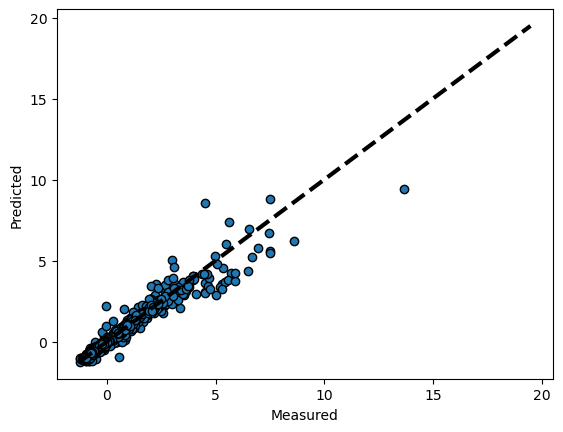

In [29]:
fig, ax=plt.subplots()
ax.scatter(Y_test,predicted_prices,edgecolors=(0,0,0))
ax.plot([Y.min(),Y.max()],[Y.min(),Y.max()], 'k--' ,lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')


In [30]:
r2_score(predicted_prices, Y_test)

0.9436711270102395